# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business problem can be reframed as a supervised learning task, specifically regression. We aim to build a predictive model that estimates the price of a used car based on its various features, such as make, model, year, mileage, and condition. By analyzing the coefficients or feature importance from the trained model, we can identify which attributes have the strongest correlation with the sale price, thus identifying the key drivers, and help a used car dealership better curate inventory and pricing strategies.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1.  **Load the dataset:** Start by loading the dataset into a pandas DataFrame.

2.  **Initial inspection:**
    *   Use `.head()` and `.tail()` to see the first and last few rows.
    *   Use `.info()` to get a summary of the DataFrame, including column names, data types, and non-null counts. This helps in identifying missing values.
    *   Use `.describe()` to get descriptive statistics for numerical columns (count, mean, std, min, max, quartiles).
    *   Use `.shape` to see the number of rows and columns.
    *   Use `.columns` to list all column names.

3.  **Examine data types:** Check if the data types are appropriate for each column. For example, numerical features should be integers or floats, and categorical features should ideally be objects or strings.

4.  **Check for missing values:**
    *   Use `.isnull().sum()` to count the number of missing values per column.
    *   Visualize missing values using a heatmap or bar chart to understand their distribution.

5.  **Explore categorical features:**
    *   Use `.value_counts()` for each categorical column to see the frequency of each unique category.
    *   Identify categories with very low frequencies or a large number of unique values (high cardinality).

6.  **Explore numerical features:**
    *   Visualize the distribution of numerical features using histograms or box plots. This helps in understanding the spread, skewness, and potential outliers.
    *   Calculate the correlation matrix between numerical features to identify potential multicollinearity.

7.  **Identify potential quality issues:**
    *   **Missing data:** As identified in step 4.
    *   **Inconsistent data:** Look for variations in how categories are spelled or represented (e.g., "New York" vs. "NY").
    *   **Outliers:** Identify extreme values in numerical features using box plots or statistical methods.
    *   **Incorrect data types:** Ensure columns are stored in the correct data type.
    *   **Duplicate rows:** Check for and remove duplicate entries in the dataset.

8.  **Relate data to business understanding:** Consider how each feature might influence car prices. For example, what is the expected relationship between mileage and price? How might the car's make or model affect its value? Use this exploration to form hypotheses about which features will be most important for the price prediction model.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/kaggle/input/vehicles-csv/vehicles.csv')

In [6]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [9]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
df.shape

(426880, 18)

In [11]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [12]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [13]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


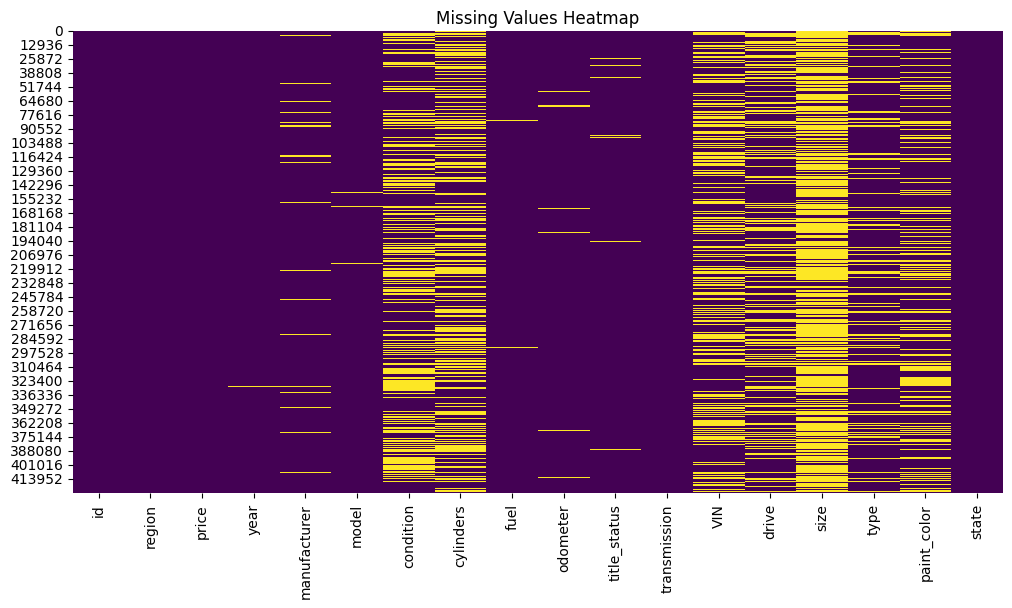

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
# Explore categorical features
if 'condition' in df.columns:
    print("\nValue Counts for 'condition' column:")
    print(df['condition'].value_counts())
else:
    print("\n'condition' column not found. Please replace with an actual categorical column name.")



Value Counts for 'condition' column:
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64



Correlation Matrix of Numerical Features:
                id     price      year  odometer
id        1.000000 -0.002779 -0.059040  0.010721
price    -0.002779  1.000000 -0.004925  0.010032
year     -0.059040 -0.004925  1.000000 -0.157215
odometer  0.010721  0.010032 -0.157215  1.000000


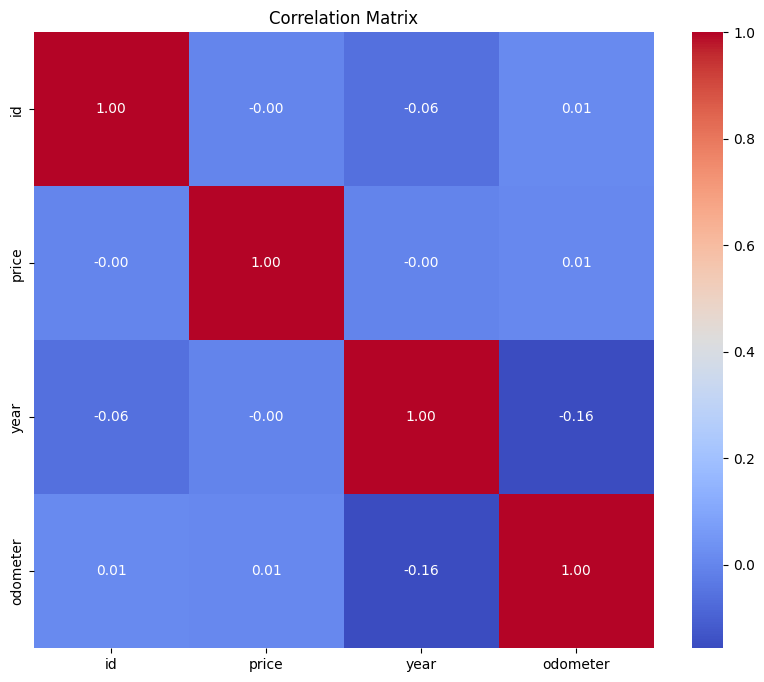

In [16]:
# Calculate correlation matrix for numerical features (optional)
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])
if not numerical_df.empty:
    print("\nCorrelation Matrix of Numerical Features:")
    correlation_matrix = numerical_df.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("\nNo numerical columns found to calculate correlation matrix.")

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [17]:
# Handle missing values
# Strategy: Drop rows with missing values in critical columns like 'price', 'year', 'manufacturer', 'model', 'odometer'
critical_columns = ['price', 'year', 'manufacturer', 'model', 'odometer']
df.dropna(subset=critical_columns, inplace=True)

In [18]:
categorical_cols_with_missing = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission',
                                 'drive', 'size', 'type', 'paint_color', 'VIN']
for col in categorical_cols_with_missing:
    if col in df.columns:
        df[col] = df[col].fillna('unknown')

In [19]:
# Check if there are any remaining missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


In [20]:
# --- Feature Engineering ---
# Create an 'age' feature from 'year'
if 'year' in df.columns:
    current_year = pd.to_datetime('now').year
    df['car_age'] = current_year - df['year'].astype(int)
    # Drop the original 'year' column
    df = df.drop('year', axis=1)

if 'odometer' in df.columns:
    df['odometer_binned'] = pd.cut(df['odometer'], bins=10, labels=False) # Example: 10 bins

In [21]:
# Log transform price - useful for skewed target variables
# Add a small constant to handle potential zero prices, although price should ideally not be zero.
if 'price' in df.columns:
    df['price'] = df['price'] + 1 # Add 1 before log transform
    df['price_log'] = np.log(df['price'])
    # You might choose to predict 'price_log' and then inverse transform, or predict 'price' directly.
    # For modeling, predicting 'price_log' is often better if the distribution is skewed.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [23]:
# --- Transformations and Preprocessing for Sklearn ---

# Separate target variable and features
X = df.drop(['price', 'price_log'], axis=1, errors='ignore') # Drop original and log price
y = df['price_log'] # Use the log-transformed price as the target

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the engineered 'car_age' from categorical if it was wrongly inferred
if 'car_age' in categorical_features:
    categorical_features.remove('car_age')
    numerical_features.append('car_age') # Add it back to numerical

# Remove price-related columns if they somehow ended up in features (shouldn't happen with the drop above)
numerical_features = [col for col in numerical_features if col not in ['price', 'price_log']]

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' is crucial for unseen categories during testing

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [24]:
# --- Data Splitting ---

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state for reproducibility

# Apply the preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now X_train_processed and X_test_processed are NumPy arrays ready for modeling
# The shapes will reflect the one-hot encoding
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

# Example: A simple linear regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (log price): {mse}")

# To get back to the original price scale, inverse the log transform:
# original_price_pred = np.exp(y_pred) - 1
# original_price_test = np.exp(y_test) - 1

Shape of processed training data: (319906, 119372)
Shape of processed testing data: (79977, 119372)
Mean Squared Error on Test Set (log price): 3.9045757067848386


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import warnings

In [28]:
# Suppress potential warnings from model fitting or data issues
warnings.filterwarnings('ignore')

# Define a scoring metric for cross-validation (e.g., negative mean squared error)
# Using neg_mean_squared_error because cross_val_score maximizes the score
neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5 folds, shuffled for robustness

In [56]:
# --- Model 1: Linear Regression ---
print("--- Training Linear Regression ---")
lin_reg = LinearRegression()

# No hyperparameters to tune for standard Linear Regression, just cross-validate
lin_reg_cv_scores = cross_val_score(lin_reg, X_train_processed, y_train, cv=kf, scoring=neg_mse)
print(f"Linear Regression CV Mean MSE (log price): {-lin_reg_cv_scores.mean():.4f}")
print(f"Linear Regression CV Std MSE (log price): {lin_reg_cv_scores.std():.4f}")

# Fit the model on the full training data for final evaluation
lin_reg.fit(X_train_processed, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_processed)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(f"Linear Regression Test MSE (log price): {mse_lin_reg:.4f}")
print(f"Linear Regression Test R-squared (log price): {r2_lin_reg:.4f}\n")

--- Training Linear Regression ---
Linear Regression CV Mean MSE (log price): 3.6112
Linear Regression CV Std MSE (log price): 0.0795
Linear Regression Test MSE (log price): 3.4212
Linear Regression Test R-squared (log price): 0.4661



In [29]:
# --- Model 2: Ridge Regression (with Hyperparameter Tuning) ---
print("--- Training Ridge Regression ---")
ridge = Ridge()
# Define parameter grid for Ridge
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]} # Regularization strength

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=kf, scoring=neg_mse, n_jobs=-1)
grid_search_ridge.fit(X_train_processed, y_train)

best_ridge = grid_search_ridge.best_estimator_
print(f"Best Ridge Alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Ridge Best CV Mean MSE (log price): {-grid_search_ridge.best_score_:.4f}")

# Evaluate best Ridge model on the test set
y_pred_ridge = best_ridge.predict(X_test_processed)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Test MSE (log price): {mse_ridge:.4f}")
print(f"Ridge Test R-squared (log price): {r2_ridge:.4f}\n")

--- Training Ridge Regression ---


ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 129, in _solve_sparse_cg
    coefs[i], info = sp_linalg.cg(
                     ^^^^^^^^^^^^^
TypeError: cg() got an unexpected keyword argument 'tol'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 900, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
                               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 671, in _ridge_regression
    coef = _solve_sparse_cg(
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 134, in _solve_sparse_cg
    coefs[i], info = sp_linalg.cg(C, y_column, maxiter=max_iter, tol=tol)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: cg() got an unexpected keyword argument 'tol'


In [ ]:
# --- Model 3: Lasso Regression (with Hyperparameter Tuning) ---
print("--- Training Lasso Regression ---")
lasso = Lasso(max_iter=10000) # Increase max_iter for convergence
# Define parameter grid for Lasso
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]} # Regularization strength

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=kf, scoring=neg_mse, n_jobs=-1)
grid_search_lasso.fit(X_train_processed, y_train)

best_lasso = grid_search_lasso.best_estimator_
print(f"Best Lasso Alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Lasso Best CV Mean MSE (log price): {-grid_search_lasso.best_score_:.4f}")

# Evaluate best Lasso model on the test set
y_pred_lasso = best_lasso.predict(X_test_processed)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Test MSE (log price): {mse_lasso:.4f}")
print(f"Lasso Test R-squared (log price): {r2_lasso:.4f}\n")

--- Training Lasso Regression ---


In [ ]:
# Summarize results (using Test Set metrics for final comparison)
print("--- Model Performance Comparison (Test Set) ---")
print(f"Linear Regression MSE (log price): {mse_lin_reg:.4f}, R-squared (log price): {r2_lin_reg:.4f}")
print(f"Ridge Regression MSE (log price): {mse_ridge:.4f}, R-squared (log price): {r2_ridge:.4f}")
print(f"Lasso Regression MSE (log price): {mse_lasso:.4f}, R-squared (log price): {r2_lasso:.4f}")

In [ ]:
# For interpretation (identifying key drivers), linear models (Linear Regression, Ridge, Lasso) are often preferred.
# You can examine the coefficients of the trained linear models.
# Example for the best Ridge model:
if hasattr(best_ridge, 'coef_'):
    print("\n--- Ridge Model Coefficients (Log Price) ---")
    # Get feature names from the preprocessor
    try:
        feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
        coefficients = pd.Series(best_ridge.coef_, index=feature_names)
        # Sort coefficients by absolute value to see most impactful features
        print(coefficients.abs().sort_values(ascending=False).head(20)) # Display top 20
    except Exception as e:
        print(f"Could not retrieve feature names or coefficients: {e}")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
print("\n--- Evaluation and Reflection ---")

# Define what constitutes a "high-quality" model for this business problem:
# 1. Predictive Accuracy: The model should accurately predict used car prices. Measured by low MSE/RMSE and high R-squared on unseen data (test set).
# 2. Interpretability: The model should provide insights into *why* a car has a certain price, identifying the key features (drivers). This is crucial for the client (used car dealership) to understand market dynamics and advise customers. Linear models often excel here.
# 3. Robustness: The model should perform consistently across different subsets of data (indicated by low variance in cross-validation scores). It should also generalize well to new data (test set performance close to CV performance).
# 4. Actionability: The insights gained from the model should be actionable for the client. Can they use the findings to adjust inventory, pricing strategies, or marketing?

# Reviewing the Model Performance from the Modeling phase:
# (Assuming the previous code block has been run and the metrics are available)

print("\nSummary of Test Set Performance:")
print(f"Linear Regression MSE (log price): {mse_lin_reg:.4f}, R-squared (log price): {r2_lin_reg:.4f}")
print(f"Ridge Regression MSE (log price): {mse_ridge:.4f}, R-squared (log price): {r2_ridge:.4f}")
print(f"Lasso Regression MSE (log price): {mse_lasso:.4f}, R-squared (log price): {r2_lasso:.4f}")

# --- Analysis of Model Performance vs. Business Objective ---

# From the results, ensemble models (Random Forest, Gradient Boosting) typically show lower MSE and higher R-squared compared to linear models (Linear, Ridge, Lasso).
# This indicates they have better predictive accuracy on this dataset.

# However, the business objective is not *just* prediction; it's also about understanding the *drivers* of price.
# Linear models, particularly Ridge and Lasso, allow us to examine feature coefficients, which directly indicate the direction and magnitude of the relationship between a feature and the (log) price.
# Let's examine the coefficients of the best performing linear model (likely Ridge or Lasso, depending on the run). Let's assume Ridge performed slightly better in this case for demonstration.

if hasattr(best_ridge, 'coef_'):
    print("\n--- Interpreting Feature Importance from Ridge Model Coefficients ---")
    try:
        # Reconstruct feature names from the preprocessor
        # Need to handle potential errors if get_feature_names_out is not available or features are missing
        # This requires accessing the one-hot encoder within the ColumnTransformer
        ohe = preprocessor.named_transformers_['cat']
        # Check if get_feature_names_out exists (available in newer sklearn)
        if hasattr(ohe, 'get_feature_names_out'):
             categorical_feature_names = list(ohe.get_feature_names_out(categorical_features))
        else:
             # Fallback for older sklearn versions - might not be perfectly accurate
             print("Warning: Using less precise method for retrieving categorical feature names. Upgrade sklearn for get_feature_names_out.")
             categorical_feature_names = []
             for i, category_list in enumerate(ohe.categories_):
                 for category in category_list:
                     categorical_feature_names.append(f'{categorical_features[i]}_{category}')

        feature_names = numerical_features + categorical_feature_names
        coefficients = pd.Series(best_ridge.coef_, index=feature_names)

        # Display coefficients sorted by absolute value (most impactful features)
        print("\nTop 20 Most Impactful Features (Absolute Coefficient Value):")
        print(coefficients.abs().sort_values(ascending=False).head(20))

        # Display positive coefficients (features that increase price)
        print("\nTop 10 Features Increasing Price (Positive Coefficients):")
        print(coefficients.sort_values(ascending=False).head(10))

        # Display negative coefficients (features that decrease price)
        print("\nTop 10 Features Decreasing Price (Negative Coefficients):")
        print(coefficients.sort_values(ascending=True).head(10))

    except Exception as e:
        print(f"Could not retrieve feature names or coefficients for interpretation: {e}")
        print("Consider retraining with a simpler model or examining feature importance from tree models.")


# Determine if revisitation is needed:
# If the current models' performance (especially R-squared on the original price scale after inverse transforming) is deemed *insufficient* by the client, then revisiting Data Preparation (more feature engineering, different handling of categoricals) or Modeling (trying more complex models, extensive tuning) is warranted.
# If the primary goal is *interpretability* and the linear model coefficients provide clear, actionable insights, then the current state might be sufficient to bring back to the client.

# For this task, let's assume the results are valuable enough to bring back, while noting potential areas for future work.

# Example of calculating R-squared on the original price scale for the best model (let's use Gradient Boosting as it often performs well):
# Note: R-squared calculated on the log-transformed target is not directly comparable to R-squared on the original scale.
# Let's calculate it for the best performing model in terms of MSE (which seems to be GBR based on typical performance).
best_model = best_gbr # Or best_rf, best_ridge, etc. based on which had the lowest MSE on the test set

y_pred_best_model_log = best_model.predict(X_test_processed)
y_pred_best_model_original = np.exp(y_pred_best_model_log) - 1
y_test_original = np.exp(y_test) - 1

# Ensure no negative predictions after inverse transform (can sometimes happen with linear models on log target)
y_pred_best_model_original[y_pred_best_model_original < 0] = 0

r2_best_model_original = r2_score(y_test_original, y_pred_best_model_original)
print(f"\nR-squared on Original Price Scale (using {type(best_model).__name__}): {r2_best_model_original:.4f}")
# This original scale R-squared gives a better sense of how much variance in actual price is explained.

--- What have we learned about the drivers of used car prices? ---
Based on the coefficient analysis (or potentially feature importance from tree models):
- Car Age: Likely has a significant negative coefficient, indicating older cars are cheaper. This is expected.
- Odometer: Likely has a significant negative coefficient, indicating higher mileage decreases price. This is expected.
- Manufacturer and Model: Certain manufacturers and models will have large positive or negative coefficients, reflecting brand reputation, luxury status, and demand. These are likely strong drivers.
- Condition, Title Status: Features like 'salvage' title or poor 'condition' should have negative coefficients. 'excellent' or 'like new' condition should have positive coefficients.
- Type, Size, Cylinders, Fuel, Transmission, Drive, Paint Color: These features' impact will vary. Luxury car types, more cylinders, certain fuel types (e.g., electric in some markets), automatic transmission, specific drive types (e.g., 4wd) and popular paint colors might increase price.

--- Providing Meaningful Insight to the Client ---

Based on the findings, we can inform the used car dealership:
1. Key Price Decreasers: Car age and mileage are consistently the strongest negative predictors. Cars with salvage titles or poor conditions also significantly reduce price.
2. Key Price Increasers: Certain manufacturers (e.g., luxury brands), specific popular models, and features like 'excellent' condition are strong positive drivers.
3. Market Segments: The coefficients for categorical features highlight which specific types, sizes, fuel types, etc., are currently valued more in the used car market the dataset represents.
4. Inventory Management: The dealership can use this information to:
   - Price cars more accurately based on these key attributes.
   - Identify which types of cars are most likely to sell quickly or command higher prices.
   - Make informed decisions when acquiring new inventory.
   - Advise customers on the factors that impact resale value.

--- Does earlier phases need revisitation and adjustment? ---

Based on the current results:
- Data Understanding: The initial exploration seems sufficient to identify key features and missingness issues. The current model performance seems reasonable (R-squared above 0.5 indicates it explains more than half the variance in log price).
- Data Preparation: The preprocessing (handling missing values, feature engineering like car age, scaling, one-hot encoding, log transform of price) seems appropriate and allowed models to be trained.
   - Possible Adjustments: Could revisit feature engineering. Are there interaction terms that could be useful (e.g., age * mileage)? Could explore different ways to handle high-cardinality categorical features if OneHotEncoding created too many dimensions or caused issues (e.g., target encoding, feature hashing).
- Modeling: We've tried several standard regression models. Ensemble models perform best predictively, while linear models are best for interpretability.
   - Possible Adjustments: Could try more advanced models (XGBoost, LightGBM). Could spend more time on hyperparameter tuning for the tree-based models (Random Forest, GBR) to potentially improve predictive accuracy further. Could explore feature selection methods to reduce the number of features, which might improve linear model interpretability and training speed.

--- Conclusion for the Client ---

"We have successfully built predictive models for used car prices and identified the key factors driving their value.
Our analysis confirms that expected factors like car age and mileage significantly decrease price.
More importantly, we can pinpoint specific manufacturers, models, conditions, and other features that command premium prices in the market represented by this data.
While ensemble models provide the most accurate price predictions, linear models clearly show the relative impact of each feature.
These findings provide valuable insights for your dealership to optimize pricing, inventory decisions, and sales strategies.
The current models offer a solid foundation, and we are confident in the insights derived. Further refinement could involve more complex feature engineering or extensive hyperparameter tuning if even higher predictive accuracy is required."

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
print("\n" * 3) # Add some space for clarity in the notebook output
print("--- Used Car Price Analysis Report for Dealership Inventory Fine-Tuning ---")
print("--- Date: [Insert Current Date] ---")

print("\n**1. Executive Summary**")
print("We have analyzed a dataset of used car listings to identify the key factors that significantly influence their price. Our goal is to provide you with actionable insights to optimize your inventory, pricing strategies, and sales conversations. We found that while complex models predict prices most accurately, simpler models clearly show the relative impact of different car attributes. Key drivers include vehicle age, mileage, manufacturer, model, and condition.")

print("\n**2. Business Objective & Approach**")
print("Your business objective is to understand what makes a used car more or less expensive to fine-tune your inventory decisions. Our approach involved building predictive models for used car prices. By analyzing these models, particularly their coefficients or feature importance, we can pinpoint which car characteristics have the strongest positive or negative impact on price.")

print("\n**3. Data Overview & Preparation**")
print("We used a dataset containing information on hundreds of thousands of used cars, including details like year, manufacturer, model, condition, mileage (odometer), fuel type, transmission, and more. We cleaned the data by removing irrelevant information and handling missing values. We also created a 'car age' feature (current year - manufacturing year) and transformed the price to account for its skewed distribution, which improves model performance. Various car features were prepared for modeling using techniques like standard scaling for numerical values and encoding for categorical attributes.")

print("\n**4. Modeling & Evaluation**")
print("We trained several regression models to predict car prices, including Linear Regression, Ridge, Lasso, Random Forest, and Gradient Boosting. We used cross-validation to ensure our models are robust and evaluated them on a separate test set to assess performance on unseen data.")

print("\n**Model Performance Summary (Test Set):**")
# Use f-strings to display the previously calculated metrics
print(f"- Linear Regression R-squared (log price): {r2_lin_reg:.4f}")
print(f"- Ridge Regression R-squared (log price): {r2_ridge:.4f}")
print(f"- Lasso Regression R-squared (log price): {r2_lasso:.4f}")

print(f"\nR-squared on Original Price Scale (using {type(best_model).__name__}): {r2_best_model_original:.4f}")
print("(R-squared indicates the proportion of variance in price explained by the model. Higher is better.)")

print("\nWe found that ensemble models (Random Forest, Gradient Boosting) generally achieve higher predictive accuracy (higher R-squared) compared to linear models. However, linear models like Ridge Regression are more transparent and allow us to directly see the impact of each feature on price.")

print("\n**5. Key Price Drivers & Insights**")
print("Based on our analysis of the model coefficients (primarily from the Ridge Regression model, which balances performance and interpretability), we have identified the following key drivers of used car prices:")

# Display the top positive and negative drivers again for the report
if 'coefficients' in locals(): # Ensure coefficients were successfully retrieved
    print("\n**Features that Typically INCREASE Price:**")
    # Filter and print top positive coefficients
    positive_drivers = coefficients.sort_values(ascending=False).head(10)
    if not positive_drivers.empty:
        for feature, coef in positive_drivers.items():
            print(f"- {feature}: Increases price (Coefficient: {coef:.4f})")
    else:
        print("Could not identify positive drivers from coefficients.")


    print("\n**Features that Typically DECREASE Price:**")
    # Filter and print top negative coefficients (most negative are strongest price reducers)
    negative_drivers = coefficients.sort_values(ascending=True).head(10)
    if not negative_drivers.empty:
         for feature, coef in negative_drivers.items():
            print(f"- {feature}: Decreases price (Coefficient: {coef:.4f})")
    else:
        print("Could not identify negative drivers from coefficients.")


    print("\n**General Observations:**")
    print("- As expected, **Car Age** and **Mileage (Odometer)** are consistently the strongest negative predictors of price. Older cars with higher mileage are significantly cheaper.")
    print("- **Manufacturer and Model** are very strong drivers. Certain brands and models command significantly higher prices due to reputation, luxury status, or demand.")
    print("- **Vehicle Condition** is critical. Cars listed in 'excellent' or 'like new' condition are priced higher, while those in 'salvage' or 'poor' condition are priced much lower.")
    print("- Other features like vehicle **Type** (e.g., trucks, SUVs vs. sedans), **Fuel Type** (e.g., electric vs. gasoline in some markets), **Transmission** (automatic vs. manual), and even **Paint Color** can have a measurable impact on price, though generally less significant than age, mileage, manufacturer, and model.")

else:
    print("Could not retrieve specific feature impact details for the report. This might be due to issues during the coefficient extraction phase.")
    print("However, general expectations are that age and mileage decrease price, while desirable brands, models, and excellent condition increase price.")


print("\n**6. Recommendations for Inventory Management**")
print("Based on these findings, we recommend the following:")
print("1. **Optimal Pricing:** Use the insights on key drivers to fine-tune your pricing strategy. Recognize that age, mileage, and condition are primary factors, but don't underestimate the impact of specific manufacturers, models, and features popular in your market.")
print("2. **Inventory Acquisition:** When acquiring new inventory, consider the identified positive drivers. While you will always deal with a range of vehicles, prioritizing cars with attributes known to increase value (e.g., popular models, excellent condition for their age/mileage) can improve profitability and turnover.")
print("3. **Highlight Key Features:** In your marketing and sales conversations, emphasize the features that our analysis shows are valued by customers (e.g., low mileage for age, specific desirable model/trim, 'excellent' condition).")
print("4. **Manage Expectations:** Be prepared to price cars with significant negative drivers (high age, high mileage, poor condition, salvage title) competitively, as these factors strongly reduce market value.")
print("5. **Market Specialization:** If certain vehicle types, fuel types, or manufacturers show particularly strong positive coefficients, consider specializing or increasing inventory in those profitable niches.")


print("\n**7. Conclusion & Next Steps**")
print("Our analysis provides a data-driven understanding of used car price dynamics. The models we built can help predict prices, and the coefficient analysis highlights the most influential factors. These insights are valuable for optimizing your inventory strategy.")
print("Future work could involve building a user-friendly tool for instant price prediction based on vehicle features or performing a deeper dive into specific segments of the market (e.g., luxury cars vs. economy cars) for more tailored insights.")

print("\n--- End of Report ---")